In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 



In [50]:
df = pd.read_csv("train_loan.csv") 

# Data Exploratory Analysis

In [51]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [52]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [53]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000ACDC78F5C8>,
      dtype=object)

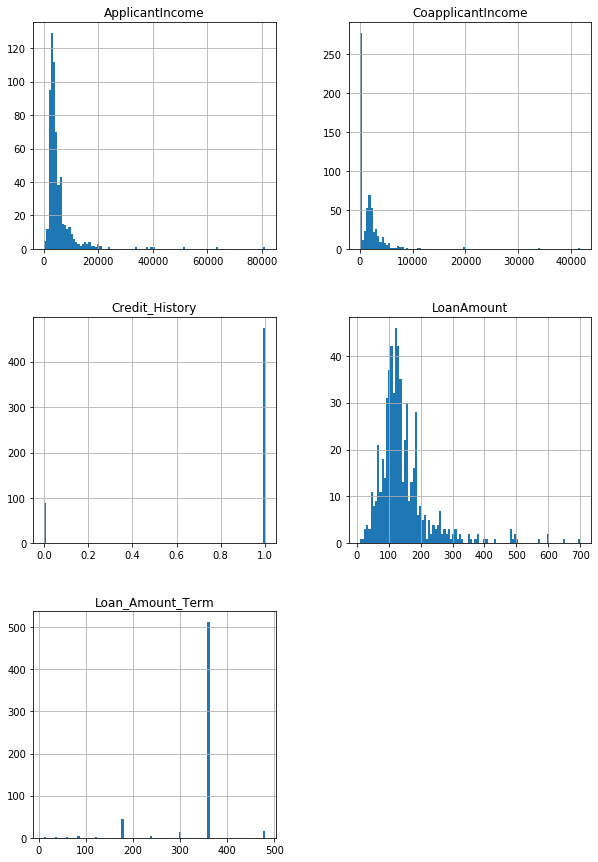

In [54]:
%matplotlib inline
df.hist(bins=100,figsize=(10,15))



# From the above histograms it can be seen that there are some extreme values and for that reason to make it clear we are using boxplot to find out the outliers and their position

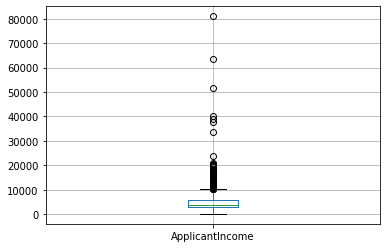

In [55]:
df.boxplot(column='ApplicantIncome')

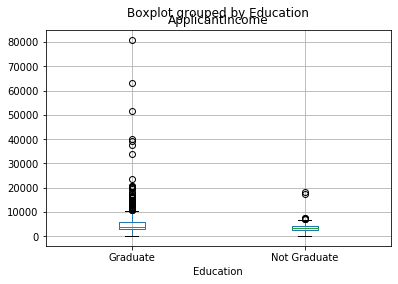

In [56]:
df.boxplot(column='ApplicantIncome', by = 'Education')

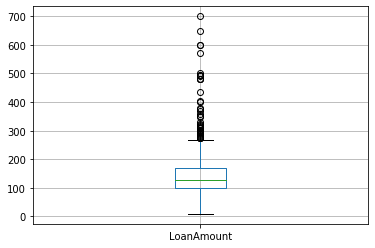

In [57]:
df.boxplot(column='LoanAmount')

# Dealing with categorical Values

In [58]:
freq_count_credit_history=df['Credit_History'].value_counts() #frequency count of credit history
print(freq_count_credit_history)

1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [59]:
#pivot table 
table1= pd.pivot_table(df, values='Loan_Status', index='Credit_History', aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Probability of getting loan by credit history\n',table1)

Probability of getting loan by credit history
                 Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


# Subplot

AxesSubplot(0.125,0.125;0.352273x0.755) AxesSubplot(0.547727,0.125;0.352273x0.755)


Text(0.5, 1.0, 'Probability of getting loan by credit history')

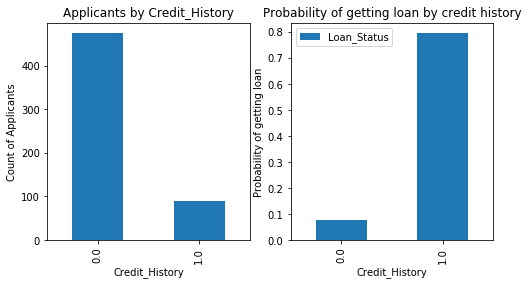

In [60]:

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(8,4), sharex=True)
print(ax1,ax2)
 
freq_count_credit_history.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Credit_History') 
ax1.set_ylabel('Count of Applicants') 
ax1.set_title("Applicants by Credit_History") 
 

table1.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Credit_History') 
ax2.set_ylabel('Probability of getting loan') 
ax2.set_title("Probability of getting loan by credit history")


# Crosstab

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


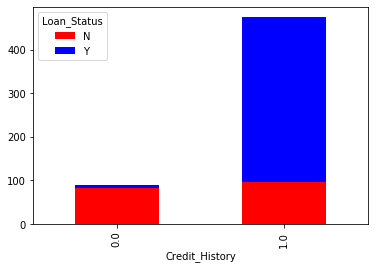

In [61]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status']) 
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
print(temp3)

In [62]:
table2= pd.pivot_table(df, values='Loan_Status', index='Credit_History', columns=['Gender'], aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Probability of getting loan by credit history and Gender\n',table2)

Probability of getting loan by credit history and Gender
 Gender            Female      Male
Credit_History                    
0.0             0.058824  0.086957
1.0             0.761905  0.803665


Text(0.5, 1.0, ':Loan payment by Credit_History and Gender')

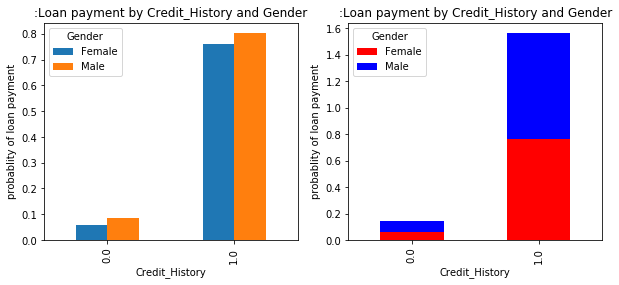

In [71]:

fig, (ax3,ax4) = plt.subplots(nrows=1,ncols=2, figsize=(10,4), sharex=True)

table2.plot(kind='bar',ax=ax3)
ax3.set_xlabel('Credit_History') 
ax3.set_ylabel('probablity of loan payment') 
ax3.set_title(":Loan payment by Credit_History and Gender") 
 

table2.plot(kind='bar',stacked=True, color=['red','blue'], grid=False,ax=ax4)
ax4.set_xlabel('Credit_History') 
ax4.set_ylabel('probablity of loan payment') 
ax4.set_title(":Loan payment by Credit_History and Gender") 


# Data munging
## Missing Values counting and  handing

In [17]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

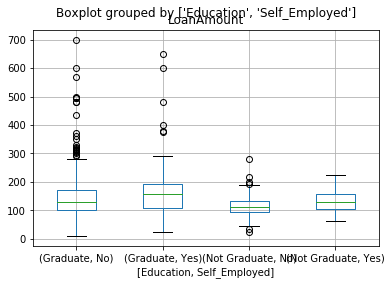

In [18]:
df.boxplot(column='LoanAmount', by = ['Education', 'Self_Employed'])

In [19]:
###we are filing the missing values of loan amount by detecting 
###whether a person is educated or self-employed can combine to give a good estimate of loan amount
### we calculating the median value of loan amount is given to the particular group
##but before that we have to fill the missing values of self employed columns

print(df['Self_Employed'].value_counts())
df['Self_Employed'].fillna('No',inplace=True)


table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median) 
print(table)

No     500
Yes     82
Name: Self_Employed, dtype: int64
Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         113.0
Yes               157.5         130.0


In [20]:

##we define a function, which returns the values of the cells of pivot table abpve and apply it to fill the missing values of loan amount:
def fage(x): 
    
    return table.loc[x['Self_Employed'],x['Education']] 
# Replace missing values
df['LoanAmount'][df['LoanAmount'].isnull()] = df[df['LoanAmount'].isnull()].apply(fage, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Log Transformation
## Log transformation is used to make the skewd data normal
### Loan amount columns contains so much outleirs , instead of treating them as outliers we just nullify them by using log transformaion

In [21]:
df['LoanAmount_log'] = np.log(df['LoanAmount']) 


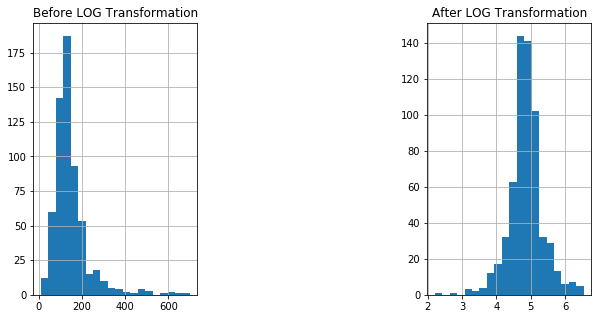

In [22]:
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(131)
ax1.set_title("Before LOG Transformation")
df['LoanAmount'].hist(bins=20)

ax2=fig.add_subplot(133)

ax2.set_title("After LOG Transformation")
df['LoanAmount_log'].hist(bins=20)

### One intuition can be that some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

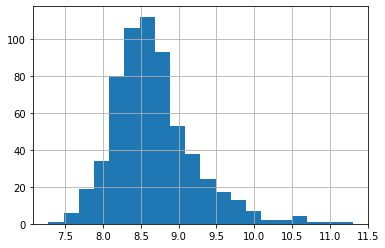

In [23]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome'] 
df['TotalIncome_log'] = np.log(df['TotalIncome']) 
df['TotalIncome_log'].hist(bins=20) 